In [2]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
G = nx.generators.watts_strogatz_graph(20,4,1)
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels=True)
plt.show() 

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 400x400 with 1 Axes>

In [3]:
def graph_index(G):
    # G = nx.random_graphs.barabasi_albert_graph(1000, 3)  # 生成一个n=1000，m=3的BA无标度网络
    print("节点总数:", G.number_of_nodes())
    print("边总数:", G.number_of_edges())
    print("平均聚类系数(average clustering): ", nx.average_clustering(G))
    print("网络传递性(transitivity): ", nx.transitivity(G))
    print("网络直径(diameter): ", nx.diameter(G))
    print("平均最短路径(average shortest path length): ", nx.average_shortest_path_length(G))


    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = closeness_centrality.values()
    betweenness_centrality = betweenness_centrality.values()
    print("平均度中心性(degree centrality): ", np.average(degree_centrality.values()))
    print("平均距离中心性(closeness centrality): ", np.average(closeness_centrality.values()))
    print("平均介数中心性(betweenness centrality): ", np.average(betweenness_centrality.values()))
    # NetworkX 还提供了经常使用的图论经典算法，例如DFS、BFS、最短路、最小生成树、最大流等等
    # path = nx.all_pairs_shortest_path(G)  # 调用多源最短路径算法，计算图G全部节点间的最短路径
    # print(path[0][2])  # 输出节点0、2之间的最短路径序列： [0, 1, 2]

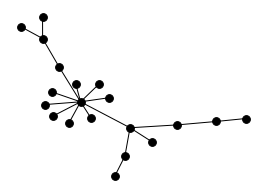

In [4]:
G = nx.barabasi_albert_graph(20,1)
plt.figure(figsize=(3.5,2.5))
pos = nx.spring_layout(G)
nx.draw(G,pos,node_size = 60,node_color = 'black')
plt.show()

In [1]:
import pickle
with open(r'data_4_10_合作型','rb') as f :
    data_cooperate = pickle.load(f)
with open(r'data_4_10_竞合型','rb') as f :
    data_cox = pickle.load(f)
with open(r'data_4_10_竞争型','rb') as f :
    data_compete = pickle.load(f)
# with open(r'C:/Users/yeshang/Desktop/内卷仿真/实验数据/data_4_10_WS08','rb') as f :
#     data_WS08 = pickle.load(f)
# with open(r'C:/Users/yeshang/Desktop/内卷仿真/实验数据/data_4_10_随机','rb') as f :
#     data_Random = pickle.load(f)

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
def cal_CV(l):
    sd = np.std(l)
    mean = np.mean(l)
    if mean == 0:
        return 0
    return sd/mean

In [6]:
def cal(data):
    input_system = []
    input_all_system = []
    output_system = []
    output_all_system = []
    reward_system = []
    reward_all_system = []
    input_system_cv = []
    input_all_system_cv = []
    output_system_cv = []
    output_all_system_cv = []
    reward_system_cv = []
    reward_all_system_cv = []
#     ROI = []
#     ROI_all = []
    for i in range(200):
        res = data['day '+str(i)]

        input_system.append(sum(res['input']))
        input_system_cv.append(cal_CV(res['input']))

        input_all_system.append(sum(res['input_all']))
        input_all_system_cv.append(cal_CV(res['input_all']))

        output_system.append(sum(res['output']))
        output_system_cv.append(cal_CV(res['output']))

        output_all_system.append(sum(res['output_all']))
        output_all_system_cv.append(cal_CV(res['output_all']))

        reward_system.append(sum(res['reward']))
        reward_system_cv.append(cal_CV(res['reward']))

        reward_all_system.append(sum(res['reward_all']))
        reward_all_system_cv.append(cal_CV(res['reward_all']))
    return input_system,input_all_system,output_system,output_all_system,input_system_cv,input_all_system_cv,output_system_cv,output_all_system_cv,reward_system,reward_system_cv,reward_all_system,reward_all_system_cv

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


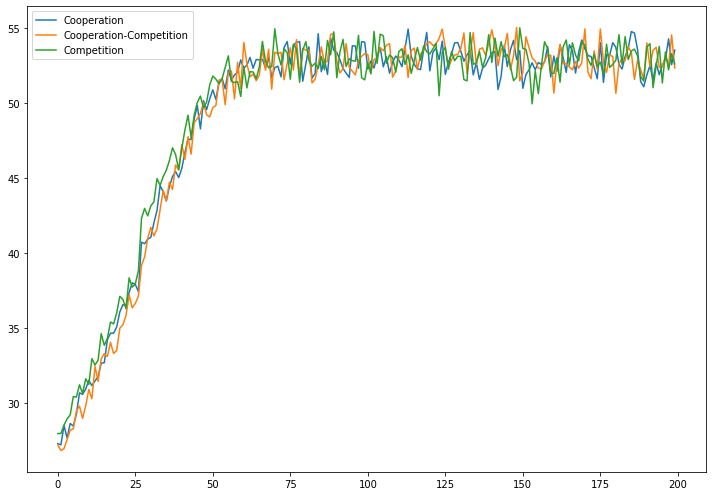

In [7]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(10,7))
for i in [data_cooperate,data_cox,data_compete]:
    input_system,input_all_system,output_system,output_all_system,input_system_cv,input_all_system_cv,output_system_cv,output_all_system_cv,reward_system,reward_system_cv,reward_all_system,reward_all_system_cv = cal(i)
    plt.plot(input_system)
plt.legend(['Cooperation','Cooperation-Competition','Competition'])
plt.tight_layout()
#plt.title('不同竞争策略下的系统总投入') #figure 13 

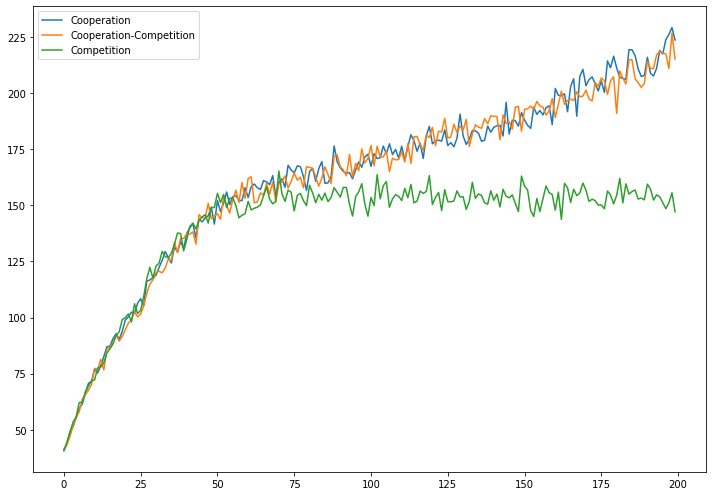

In [8]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(10,7))
for i in [data_cooperate,data_cox,data_compete]:
    input_system,input_all_system,output_system,output_all_system,input_system_cv,input_all_system_cv,output_system_cv,output_all_system_cv,reward_system,reward_system_cv,reward_all_system,reward_all_system_cv = cal(i)
    plt.plot(output_system)
#plt.legend(['合作型策略','竞合型策略','竞争型策略'])
plt.legend(['Cooperation','Cooperation-Competition','Competition'])
plt.tight_layout()
#plt.title('不同竞争策略下的系统总产出') #figure 14

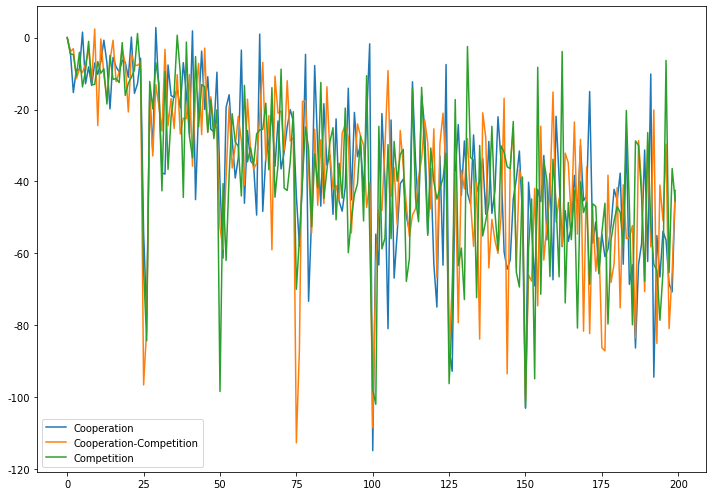

In [9]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,7))
for i in [data_cooperate,data_cox,data_compete]:
    input_system,input_all_system,output_system,output_all_system,input_system_cv,input_all_system_cv,output_system_cv,output_all_system_cv,reward_system,reward_system_cv,reward_all_system,reward_all_system_cv = cal(i)
    plt.plot(reward_system)
plt.legend(['Cooperation','Cooperation-Competition','Competition'])
plt.tight_layout()
#plt.title('不同竞争策略下的系统总回报') # figure 15

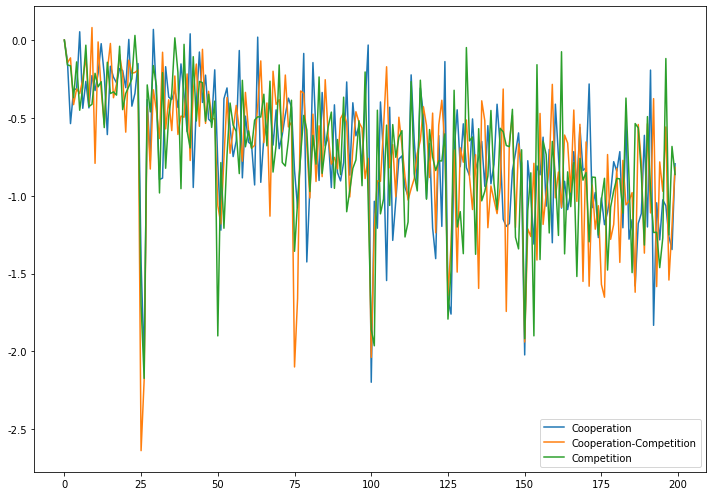

In [10]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,7))
for i in [data_cooperate,data_cox,data_compete]:
    input_system,input_all_system,output_system,output_all_system,input_system_cv,input_all_system_cv,output_system_cv,output_all_system_cv,reward_system,reward_system_cv,reward_all_system,reward_all_system_cv = cal(i)
    plt.plot([x for x in range(200)], [x / y for x, y in zip(reward_system, input_system)])
plt.legend(['Cooperation','Cooperation-Competition','Competition'])
plt.tight_layout()
#plt.title('不同竞争策略下的系统ROI') # figure 16

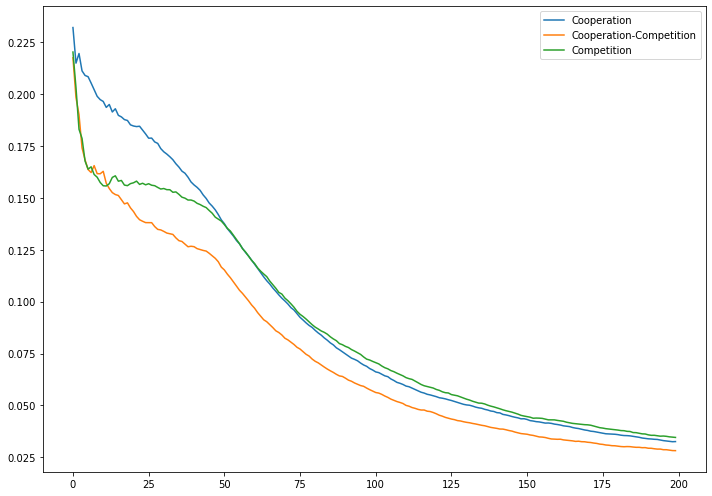

In [11]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,7))
for i in [data_cooperate,data_cox,data_compete]:
    input_system,input_all_system,output_system,output_all_system,input_system_cv,input_all_system_cv,output_system_cv,output_all_system_cv,reward_system,reward_system_cv,reward_all_system,reward_all_system_cv = cal(i)
    plt.plot(input_all_system_cv)
plt.legend(['Cooperation','Cooperation-Competition','Competition'])
plt.tight_layout()
#plt.title('不同竞争策略下的系统累计总投入变异系数') # figure 17

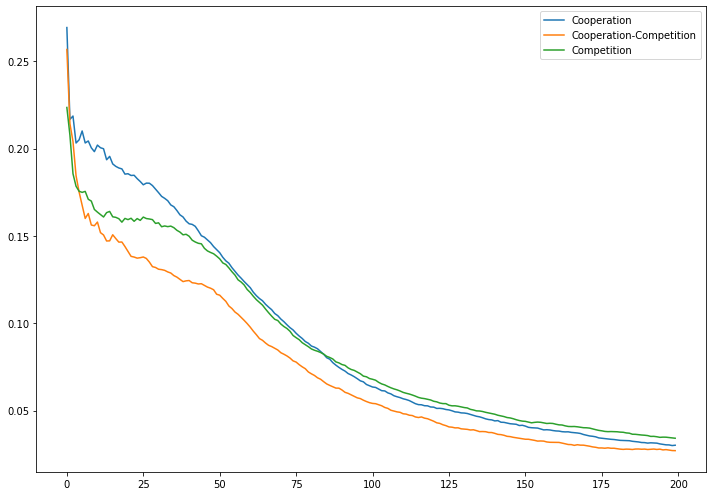

In [12]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,7))
for i in [data_cooperate,data_cox,data_compete]:
    input_system,input_all_system,output_system,output_all_system,input_system_cv,input_all_system_cv,output_system_cv,output_all_system_cv,reward_system,reward_system_cv,reward_all_system,reward_all_system_cv = cal(i)
    plt.plot(output_all_system_cv)
plt.legend(['Cooperation','Cooperation-Competition','Competition'])
plt.tight_layout()
#plt.title('不同竞争策略下的系统累计总产出变异系数')  #figure 18